# Определение перспективного тарифа для телеком-компании Megaline

## Обзор данных

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls.head())
df_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [2]:
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.head())
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages.head())
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [4]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(df_tariffs.head())
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [5]:
df_internet = pd.read_csv('/datasets/internet.csv')
display(df_internet.head())
df_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Данные предоставленны хорошие: наименования столбцов названы корректно,типы данных почти всегде верные.

### Приведение данных к нужному типу

In [6]:
#переводим столбцы с датами в удобный формат datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'],format='%Y-%m-%d')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')

### Исправление ошибок в данных

In [7]:
print(df_calls.duplicated().sum())#проверили датасеты на дубликаты
print(df_internet.duplicated().sum())
print(df_messages.duplicated().sum())
print(df_users.duplicated().sum())

0
0
0
0


In [8]:
# проверили датасеты на пустоты
print(df_calls.isna().sum())
print(df_internet.isna().sum())
print(df_messages.isna().sum())
print(df_users.isna().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
id              0
message_date    0
user_id         0
dtype: int64
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


Дубликатов и пустот не обнаружено.
В значении `churn_date` обнаружены пустые значения - 462, однако так и должно быть.Это значит что на момент выгрузки пользователь оставался клиентом компании с выбранным тарифом. 

In [9]:
df_internet = df_internet[['id', 'mb_used', 'session_date', 'user_id']]# убрали столбец 'Unnamed: 0' дублирующий индексы
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


## Производим необходимые расчеты

Нам предстоит сформировать таблицы, показывающие, сколько было израсходовано трафика(минут,мегабайт,сообщений) клиентами с определенным тарифом в месяц.

In [10]:
df_calls['date_month'] = df_calls['call_date'].astype('datetime64[M]')#создаем столбец со значением месяца
df_messages['date_month'] = df_messages['message_date'].astype('datetime64[M]')
df_internet['date_month'] = df_internet['session_date'].astype('datetime64[M]')

### Количество произведенных звонков и израсходованных минут в месяц

Нам известно, что оператор округляет значение по использованным минутам в моменте. Значит, все значения в столбце `duration` в таблице `df_calls` необходимо округлить до целого значения в большую сторону.

In [11]:
#значения до округления
df_calls['duration']

0          0.00
1          0.00
2          2.85
3         13.80
4          5.18
          ...  
202602     0.76
202603    18.83
202604    10.81
202605     4.27
202606    19.62
Name: duration, Length: 202607, dtype: float64

In [12]:
#значения после округления
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['duration']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

In [13]:
# таблица количество сделанных звонков и израсходованных минут разговора по месяцам
calls_to_month = df_calls.groupby(['user_id','date_month']).agg({'id':'count','duration':'sum'})
calls_to_month = calls_to_month.reset_index()
calls_to_month.rename(columns={'id':'all_calls'},inplace=True)
calls_to_month.head()

,user_id,date_month,all_calls,duration
0,1000,2018-05-01,22,159.0
1,1000,2018-06-01,43,172.0
2,1000,2018-07-01,47,340.0
3,1000,2018-08-01,52,408.0
4,1000,2018-09-01,58,466.0


### Количество отправленных сообщений в месяц

In [14]:
# количество отправленных сообщений по месяцам
messages_to_month = df_messages.groupby(['user_id','date_month']).agg({'id':'count'})
messages_to_month = messages_to_month.reset_index()
messages_to_month.rename(columns={'id':'all_sent'},inplace=True)
messages_to_month.head()

,user_id,date_month,all_sent
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


### Количество израсходованного интернет-трафика по месяцам

In [15]:
#объем израсходованного интернет-трафика по месяцам
internet_to_month = df_internet.groupby(['user_id','date_month']).agg({'mb_used':'sum'})
internet_to_month = internet_to_month.reset_index()
internet_to_month.head()

,user_id,date_month,mb_used
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91


Теперь необходимо округлить значения использованного интернет трафика до целого числа в большую сторону. Эти данные указаны в задании: "Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта."

Округлением займемся в функции `profit_cash`, которая будет описана чуть ниже.

### Таблица "Прибыль с каждого клиента по месяцам"

Сформируем из трех таблиц одну общую, это позволит нам с помощью функции произвести расчеты и посчитать прибыль с каждого клиента в месяц.

In [16]:
#схлапываем в одну таблицу 
data_frames = [calls_to_month, internet_to_month, messages_to_month]
profit_to_month = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames)
profit_to_month.head(10)

,user_id,date_month,all_calls,duration,mb_used,all_sent
0,1000,2018-05-01,22.0,159.0,2253.49,22.0
1,1000,2018-06-01,43.0,172.0,23233.77,60.0
2,1000,2018-07-01,47.0,340.0,14003.64,75.0
3,1000,2018-08-01,52.0,408.0,14055.93,81.0
4,1000,2018-09-01,58.0,466.0,14568.91,57.0
5,1000,2018-10-01,57.0,350.0,14702.49,73.0
6,1000,2018-11-01,43.0,338.0,14756.47,58.0
7,1000,2018-12-01,46.0,333.0,9817.61,70.0
8,1001,2018-11-01,59.0,430.0,18429.34,NaN
9,1001,2018-12-01,63.0,414.0,14036.66,NaN


In [17]:
#схлапываем в одну таблицу 
#profit_to_month = calls_to_month.merge(internet_to_month,how='outer')
#profit_to_month = profit_to_month.merge(messages_to_month,how='outer')
#profit_to_month.head(10)

In [18]:
df_tariffs.rename(columns={'tariff_name':'tariff'},inplace=True)#переименовываем на одинаковое название столбец тариф
df_tarif_users = df_users[['user_id','tariff']]# таблица с клиентом и его тарифом
df_user_location = df_users[['user_id','city']]#таблица с клиентом и его локацией

profit_to_month = profit_to_month.merge(df_tarif_users,on='user_id', how='left' )#добавим к основной таблице значения тарифа 
profit_to_month = profit_to_month.merge(df_user_location,on='user_id', how='left' )#добавляем к основнов табл значения локации.
profit_to_month.head()

,user_id,date_month,all_calls,duration,mb_used,all_sent,tariff,city
0,1000,2018-05-01,22.0,159.0,2253.49,22.0,ultra,Краснодар
1,1000,2018-06-01,43.0,172.0,23233.77,60.0,ultra,Краснодар
2,1000,2018-07-01,47.0,340.0,14003.64,75.0,ultra,Краснодар
3,1000,2018-08-01,52.0,408.0,14055.93,81.0,ultra,Краснодар
4,1000,2018-09-01,58.0,466.0,14568.91,57.0,ultra,Краснодар


In [19]:
#добавим теперь описание тарифов по ключевому полю тариф
profit_to_month = profit_to_month.merge(df_tariffs,on='tariff', how='left' )
profit_to_month.head()

,user_id,date_month,all_calls,duration,mb_used,all_sent,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,22.0,159.0,2253.49,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,43.0,172.0,23233.77,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,47.0,340.0,14003.64,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,52.0,408.0,14055.93,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,58.0,466.0,14568.91,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1


Получили нашу предъитоговую таблицу.

Теперь напишем функцию для расчета прибыли с каждого клиента, с учетом его тарифа, абонентской платы и стоимостью услуг сверх тарифной платы. 

In [20]:
def profit_cash(value):#считаем помесячную выручку с каждого пользователя 
    i = 0   
    c = 0
    m = 0
    substr_in = np.ceil(value['mb_used']/1024) - (value['mb_per_month_included']/1024)
    #substr_in = np.ceil(substr_in / 1024)
    if substr_in > 0:
        i = substr_in * value['rub_per_gb']
    substr_call = value['duration'] - value['minutes_included']
    if substr_call > 0:
        c = substr_call * value['rub_per_minute']
    substr_mesag = value['all_sent'] - value['messages_included']
    if substr_mesag > 0:
        m = substr_mesag * value['rub_per_message']
    return i + c + m + value['rub_monthly_fee']



In [21]:
profit_to_month['profit'] = profit_to_month.apply(profit_cash,axis=1)#применим функцию для подсчета выручки с каждого пользователя по месяцам
profit_to_month.head()

,user_id,date_month,all_calls,duration,mb_used,all_sent,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,2018-05-01,22.0,159.0,2253.49,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
1,1000,2018-06-01,43.0,172.0,23233.77,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
2,1000,2018-07-01,47.0,340.0,14003.64,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
3,1000,2018-08-01,52.0,408.0,14055.93,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
4,1000,2018-09-01,58.0,466.0,14568.91,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0


Таблица готова, прибыль с каждого клиента помесячно рассчитана и добавлена в столбец `profit`

### Количество использованных минут 

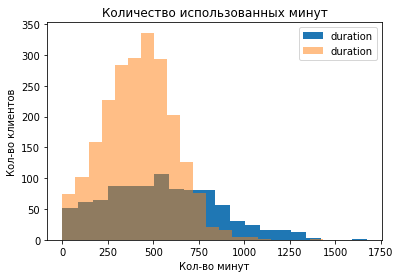

In [22]:
#график отражающий сколько потраченно минут каждым клиентом в месяц, в разных тарифах
ax = profit_to_month[profit_to_month['tariff'] == 'ultra'].plot(x='user_id', y=['duration'], kind='hist',bins=20);
plt.xlabel("Кол-во минут")
plt.title("Количество использованных минут")
profit_to_month[profit_to_month['tariff'] == 'smart'].plot(x='user_id', y=['duration'], kind='hist', ax=ax,  alpha=0.5, bins=20);
plt.ylabel("Кол-во клиентов");

In [23]:
profit_to_month.pivot_table(index= 'tariff',values= 'duration', aggfunc=['mean', 'var','std'])

,mean,var,std
,duration,duration,duration
tariff,,,
smart,419.062978,35844.189551,189.325618
ultra,545.451104,94203.418396,306.925754


На графике мы видим нормальное распределение по обоим величинам. Однако мы видим, что по тарифу Смарт распределение симетричное, а по тарифу Ультра данные немного скошены вправо.

Обратим внимание на среднее значения по каждым велечинам:

Среднее значение по минутам в тарифе Ultra: 514, при этом стандартное отклонение 289. Довольно сильный разброс данных. А так же замечу, что клиенты данного тарифа не выходят за рамки обозначенного по минутам трафика в тарифе.

Среднее значение по минутам в тарифе Smart: 395, при этом стандартное отклонение 179. Данное распределение более вытянуто(менее разбросано) и похоже на колокол. При этом клиенты данного тарифа в 1/3 случаев выходят за рамки обозначенного по минутам трафика по тарифу. Среднее 395,а всего бесплатных минут входит 500.

### Количество использованных мегабайт

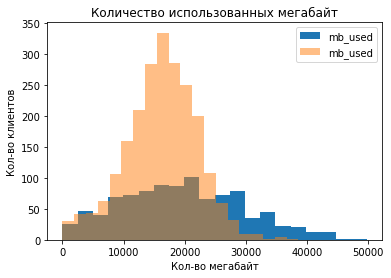

In [24]:
#график отражающий сколько потрачено каждым клиентом мб в месяц, в разных тарифах.
ay = profit_to_month[profit_to_month['tariff'] == 'ultra'].plot(x='user_id', y=['mb_used'], kind='hist',bins=20);
plt.xlabel("Кол-во мегабайт")
plt.title("Количество использованных мегабайт")
profit_to_month[profit_to_month['tariff'] == 'smart'].plot(x='user_id', y=['mb_used'], kind='hist', ax=ay,  alpha=0.5,bins=20);
plt.ylabel("Кол-во клиентов");

In [25]:
profit_to_month.pivot_table(index= 'tariff',values= 'mb_used', aggfunc=['mean', 'var','std'])

,mean,var,std
,mb_used,mb_used,mb_used
tariff,,,
smart,16215.661849,3.435995e+07,5861.736234
ultra,19668.485262,9.886425e+07,9943.050284


На данном графике, отображающем количество использованных мегабайт, мы снова видим нормальное распределение по обоим величинам. Картина схожа с предыдущим графиком. 

Обратим внимание на среднее значения по каждым велечинам:

Среднее значение по Мб в тарифе Ultra: 19668, при этом стандартное отклонение 9943. В данном случае видим, что в среднем клиенты не выходят за рамки обозначенного трафика - 30000Мб. За рамки трафика выходят только значения из 2 и 3 сигм, то есть более удаленные от среднего значения.  

Среднее значение по Мб в тарифе Smart: 16215, при этом стандартное отклонение 5861. 
При этом, большая часть распределения значений лежит за границей 15000мб - то есть почти каждый второй клиент тарифа Смарт выходит за рамки трафика,обозначенного в тарифе, таким образом приносит компании дополнительный доход сверх абонентской платы. 

### Количество потраченных сообщений

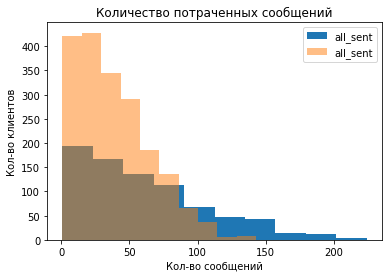

In [26]:
#график отражающий сколько потрачено каждым клиентом смс в месяц, в разных тарифах.
az = profit_to_month[profit_to_month['tariff'] == 'ultra'].plot(x='user_id', y=['all_sent'], kind='hist',bins=10);
plt.xlabel("Кол-во сообщений")
plt.title("Количество потраченных сообщений")
profit_to_month[profit_to_month['tariff'] == 'smart'].plot(x='user_id', y=['all_sent'], kind='hist', ax=az,  alpha=0.5,bins=10);
plt.ylabel("Кол-во клиентов");

In [27]:
profit_to_month.pivot_table(index= 'tariff',values= 'all_sent', aggfunc=['mean', 'var','std'])

,mean,var,std
,all_sent,all_sent,all_sent
tariff,,,
smart,38.716441,717.594201,26.787949
ultra,61.161006,2109.659183,45.931026


На данном графике, отображающем количество отправленных смс, мы видим распределение Пуассона по обоим величинам. По тарифу Ультра данные немного скошены вправо(график более пологий).

Обратим внимание на среднее значения по каждым велечинам:

Среднее значение по Мб в тарифе Ultra: 61, при этом стандартное отклонение 45. При лимите в 1000 сообщений, включенных в тариф, клиенты даже 10% трафика не используют.  

Среднее значение по Мб в тарифе Smart: 38, стандартное отклонение 26. В распределении Пуассона видно, что за границу в 50руб выходит достаточно большой процент значений, что для компании означает дополнительный доход.  

## Проверка гипотез

### Выручка по тарифу Smart

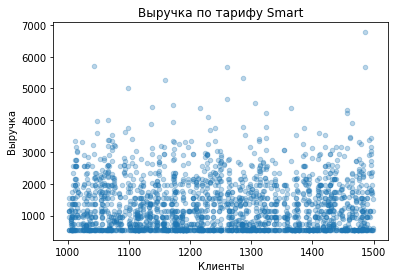

In [28]:
profit_to_month[profit_to_month['tariff'] == 'smart'].plot(x='user_id', y=['profit'], kind='scatter', alpha=0.3);
plt.ylabel("Выручка");
plt.xlabel("Клиенты")
plt.title("Выручка по тарифу Smart");

In [29]:
profit_to_month.pivot_table(index= 'tariff',values= 'profit', aggfunc=['mean', 'var','std','sum'])

,mean,var,std,sum
,profit,profit,profit,profit
tariff,,,,
smart,1289.973531,669785.708006,818.404367,2875351.0
ultra,2070.152284,141516.745079,376.187114,2039100.0


В тарифе Смарт среднее значение по выручке - 1289руб, при том что абонентская плата составляет 550руб.
Это означает, что большая часть клиентов в месяц тратит намного больше, чем абонентская плата по тарифу. 
Есть клиенты, которые платят в два, а то и в три раза больше установленного тарифным планом. На графике это достаточно хорошо видно.

### Выручка по тарифу Ultra

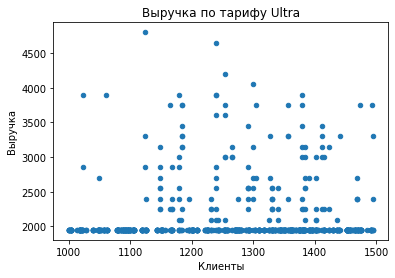

In [30]:
profit_to_month[profit_to_month['tariff'] == 'ultra'].plot(x='user_id', y=['profit'], kind='scatter');
plt.ylabel("Выручка");
plt.xlabel("Клиенты")
plt.title("Выручка по тарифу Ultra");

In [31]:
profit_to_month.pivot_table(index= 'tariff',values= 'profit', aggfunc=['mean', 'var','std','sum'])

,mean,var,std,sum
,profit,profit,profit,profit
tariff,,,,
smart,1289.973531,669785.708006,818.404367,2875351.0
ultra,2070.152284,141516.745079,376.187114,2039100.0


На графике распределения величин мы видим,что основная масса величин сосредоточена на значении 1950руб-значении абонентской платы в месяц. Очень редки те клиенты, которые превышают лимит и доплачивают за трафик дополнительно. Это же доказывает и наша средняя по выгрузке,она равна 2070, и она очень близка к цене абонентской платы.



### Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны"


Нулевая гипотеза будет звучать так : **Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.**

Альтернативная гипотеза(двусторонняя): **Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.**
В данном случае в гипотезе(из задания) нам не уточнено в какую сторону идет различие, поэтому рассматриваем двустороннюю гипотезу.
Наш датасет довольно маленький, можно было просто сравнить средние значения по каждой выборке. Но, для практики, мы воспользуемся методом `st.ttest_ind`. 

In [32]:
ultra = profit_to_month[profit_to_month['tariff'] == 'ultra']['profit']#выручка по ультра
smart = profit_to_month[profit_to_month['tariff'] == 'smart']['profit']#выручка по смарт
alpha = .01

results = st.ttest_ind(#используем такой тест так как наши выборки независимы и нормально распределены
    ultra, smart, 
    equal_var=False)#устанавливаем значение false так как наши дисперсии не равны

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


C помощью метода `st.ttest_ind` нам удалось посчитать уровень значимости. Он оказался намного меньше уровня статистической значимости 0,1. Значит, мы можем предположить, что гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны" не верна.

### Гипотеза "Средняя выручка клиентов из города "Москва" равна средней выручке клиентов из других городов."


Нулевая гипотеза будет звучать так : **Средняя выручка клиентов из города "Москва" равна средней выручке клиентов из других городов.**

Альтернативная гипотеза(двусторонняя): **Средняя выручка клиентов из Москвы различается со средней выручкой клиентов из других городов.**


In [33]:
loc_moscow = profit_to_month[profit_to_month['city'] == 'Москва']['profit']#выручка по москве
loc_other = profit_to_month[profit_to_month['city'] != 'Москва']['profit']#выручка по другим локациям
alpha = .05

results = st.ttest_ind(
    loc_moscow, loc_other, 
    equal_var=False)#устанавливаем значение false так как наши дисперсии не равны

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [34]:
profit_to_month[profit_to_month['city'] == 'Москва']['profit'].mean()


1546.7135842880523

In [35]:
profit_to_month[profit_to_month['city'] != 'Москва']['profit'].mean()

1524.9362274298885

Произведя расчеты, мы с большой уверенностью можем сказать, что гипотеза "Средняя выручка клиентов из города "Москва" равна средней выручке клиентов из других городов" верна. Р-значение равно почти 0,5, при значении уровня статистической значимость в 0,05. Данная гипотеза определенно имеет место быть. 
Для дополнительной проверки, найдем среднее по выручке в городе Москва и в других локациях: 1526 и 1501 соответственно. Два значения  различаются всего в 25руб.

То есть гипотеза, представленная в задании, которая звучит как "Средняя выручка клиентов из Москвы различается со средней выручкой клиентов из других городов", не верна.

## Общий вывод:

Произведя необходимые расчеты, мы узнали, что :
- Нулевая гипотеза Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны **не верна**.
Будет **верна** альтернативная ей гипотеза : Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

- Нулевая гипотеза Средняя выручка клиентов из города "Москва" равна средней выручке клиентов из других городов **верна**. Альтернативная гипотеза Средняя выручка клиентов из Москвы различается со средней выручкой клиентов из других городов **не верна**.

Опираясь на проведенный анализ, можно утверждать следующее:
- Прибыль от тарифа Смарт за 2018г была больше, чем прибыль от тарифа Ультра, на 800.000руб
- Клиенты, использующие тариф Смарт платят сверх абонентской платы намного чаще, чем клиенты тарифа Ультра.
- Абонентская плата за тариф Смарт является доступной для большего количества клиентов. Разница в абонентской плате за Смарт и Ультра - аж 1400руб.

Возможно, с точки зрения клиентоориентированности, можно было предложить клиентам тарифа Смарт перейти на тариф Ультра, но только тем кто тратит больше 1950руб в месяц. Тогда и клиент доволен - не выходит за рамки абонентской платы, и компания довольна - тариф Ультра будет приносить в компанию ровно по 1950руб ежемесячно,ни больше и ни меньше.
Однако, боюсь что такая цена за тариф может отпугнуть клиентов, кто выходит за эти рамки трат не так часто, и в целом почти всегда тратит меньше 1500руб в месяц, и так же это может повлиять на новых клиентов.

Поэтому я рискну предположить, что Тариф Смарт является наиболее удачным тарифом для компании.